In [13]:
# Dataset can be downloaded from Analytics vidhya
#https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
train = pd.read_csv("train.csv") 

In [15]:
test = pd.read_csv("test.csv")

In [16]:
submission = pd.read_csv("Sample_Submission.csv")

In [17]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
train.isnull().isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [20]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
# NULL values are present in  LoanAmount and Credit_History

In [ ]:
#train = train.replace(["null"], np.nan).dropna(subset=train.columns,how="any")

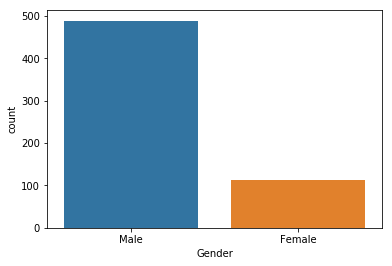

In [28]:
sns.countplot(train["Gender"])
plt.show()


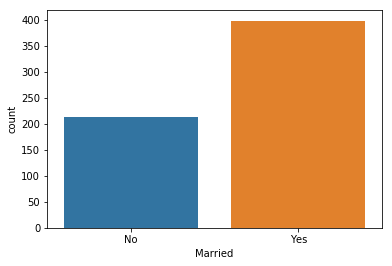

In [29]:
sns.countplot(train["Married"])
plt.show()

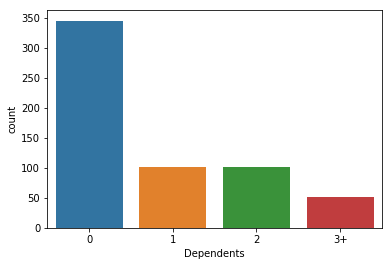

In [30]:
sns.countplot(train["Dependents"])
plt.show()

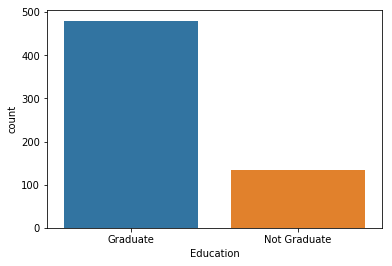

In [31]:
sns.countplot(train["Education"])
plt.show()

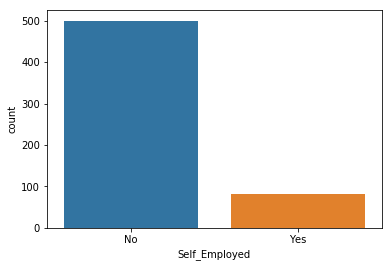

In [32]:
sns.countplot(train["Self_Employed"])
plt.show()

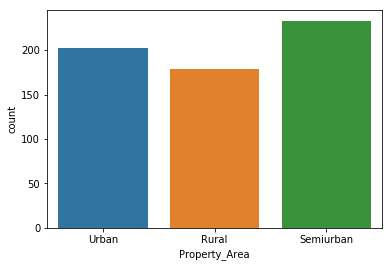

In [33]:
sns.countplot(train["Property_Area"])
plt.show()

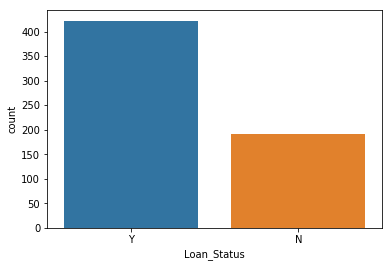

In [34]:
sns.countplot(train["Loan_Status"])
plt.show() # class imbalance

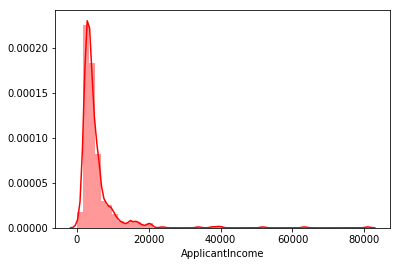

In [44]:
#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train['ApplicantIncome'], color="r")
plt.show()
#plt.setp(axes, yticks=[])
#plt.tight_layout()

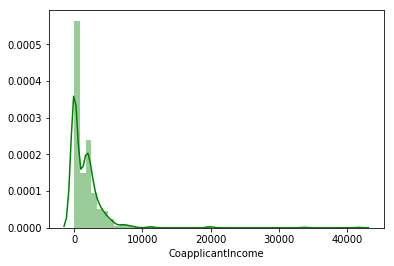

In [46]:
sns.distplot(train['CoapplicantIncome'], color="g")
plt.show()

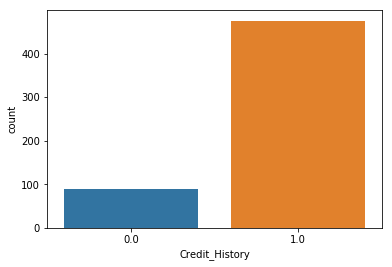

In [48]:
sns.countplot(train["Credit_History"])
plt.show()

In [67]:
for i in train:
    print("Attribute name %s, Total number of records %d, Is Not NULL %d " % (i, train[i].shape[0],train[i].count()))

Attribute name Loan_ID, Total number of records 614, Is Not NULL 614 
Attribute name Gender, Total number of records 614, Is Not NULL 601 
Attribute name Married, Total number of records 614, Is Not NULL 611 
Attribute name Dependents, Total number of records 614, Is Not NULL 599 
Attribute name Education, Total number of records 614, Is Not NULL 614 
Attribute name Self_Employed, Total number of records 614, Is Not NULL 582 
Attribute name ApplicantIncome, Total number of records 614, Is Not NULL 614 
Attribute name CoapplicantIncome, Total number of records 614, Is Not NULL 614 
Attribute name LoanAmount, Total number of records 614, Is Not NULL 592 
Attribute name Loan_Amount_Term, Total number of records 614, Is Not NULL 600 
Attribute name Credit_History, Total number of records 614, Is Not NULL 564 
Attribute name Property_Area, Total number of records 614, Is Not NULL 614 
Attribute name Loan_Status, Total number of records 614, Is Not NULL 614 


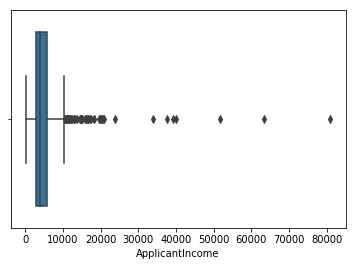

In [69]:
sns.boxplot(train['ApplicantIncome'], hue = 'Education', data = train)
plt.show()

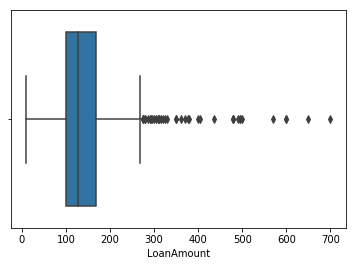

In [72]:
sns.boxplot(train['LoanAmount'])
plt.show()

# Categorical variable analysis

Chances of getting a loan based on credit history

In [74]:
temp1 = train['Credit_History'].value_counts(ascending=True)

In [75]:
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [77]:
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [78]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [79]:
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


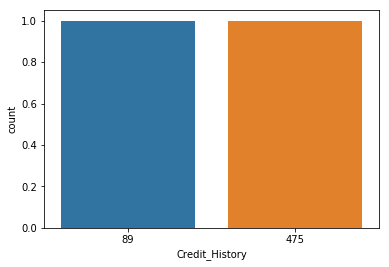

In [81]:
sns.countplot(temp1)
plt.show()

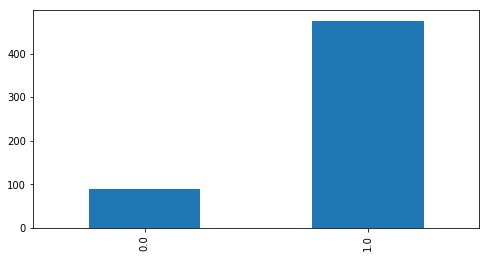

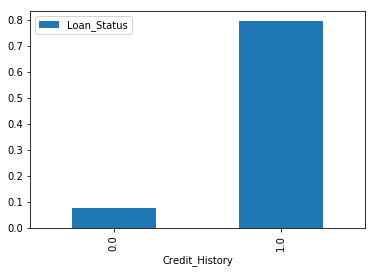

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
#ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")


#ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
plt.show()
%matplotlib inline

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. 